In [1]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Carga del dataset
df = pd.read_csv(r"D:\Users\corsair-guillem\Desktop\github projects\DQLab sales\dqlab-data\clean_data.csv")

df.head() # Muestra las 5 primera filas del dataset

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones & Communication
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories


In [3]:
df.dtypes # Muestra el tipo de datos de cada campo

order_id                  int64
order_status             object
customer                 object
order_date               object
order_quantity            int64
sales                     int64
discount                float64
discount_value            int64
product_category         object
product_sub_category     object
dtype: object

In [4]:
df.info() # Muestra información sobre el número de campos, valores nulos y tipo de datos de cada campo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              5499 non-null   int64  
 1   order_status          5499 non-null   object 
 2   customer              5499 non-null   object 
 3   order_date            5499 non-null   object 
 4   order_quantity        5499 non-null   int64  
 5   sales                 5499 non-null   int64  
 6   discount              5499 non-null   float64
 7   discount_value        5499 non-null   int64  
 8   product_category      5499 non-null   object 
 9   product_sub_category  5499 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 429.7+ KB


<Axes: >

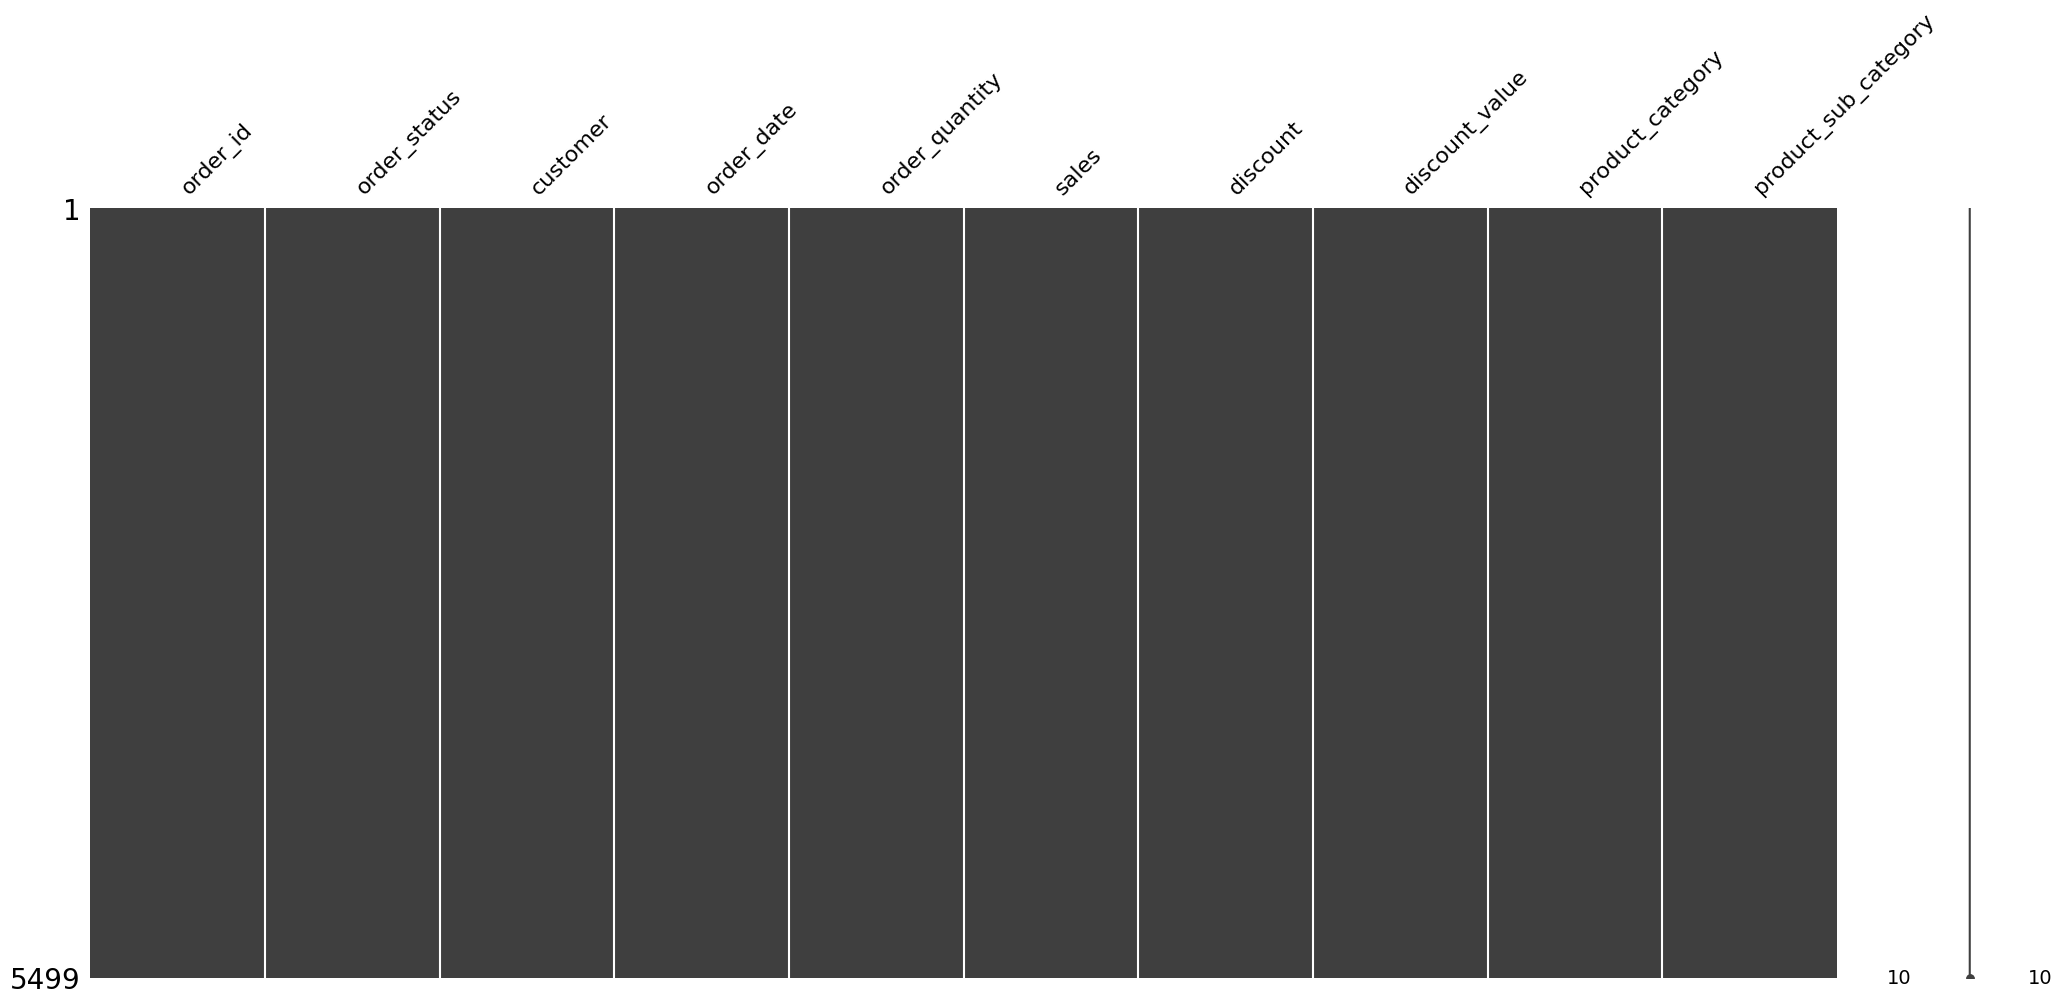

In [5]:
msno.matrix(df) # Muestra donde se encuentran los valores nulos si existen

In [6]:
df # Muestra las 5 primeras filas y últimas filas del dataset

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones & Communication
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories
...,...,...,...,...,...,...,...,...,...,...
5494,47360,Order Finished,Philip Brown,2010-10-08,25,4401280,0.05,220064,Furniture,Chairs & Chairmats
5495,52706,Order Finished,Paul Prost,2012-07-09,34,2083320,0.02,41666,Office Supplies,Binders & Binder Accessories
5496,54279,Order Finished,Lisa De Cherney,2011-07-30,41,20142180,0.10,2014218,Technology,Office Machines
5497,55558,Order Finished,Philip Brown,2010-08-09,8,2588080,0.05,129404,Furniture,Bookcases


In [7]:
print(df.isnull().sum()) # Muestra si existen valores nulos en el dataset


order_id                0
order_status            0
customer                0
order_date              0
order_quantity          0
sales                   0
discount                0
discount_value          0
product_category        0
product_sub_category    0
dtype: int64


In [8]:
numeric_columns = df.select_dtypes(include=[np.number])
print(numeric_columns.describe()) # Muestra las estadisticas descriptivas para las columnas con valores numéricos


           order_id  order_quantity         sales     discount  discount_value
count   5499.000000     5499.000000  5.499000e+03  5499.000000    5.499000e+03
mean   29970.202219       25.521549  3.532838e+06     0.049915    1.735048e+05
std    17243.318085       14.485352  7.305121e+06     0.031783    4.183615e+05
min        3.000000        1.000000  6.460000e+03     0.000000    0.000000e+00
25%    15044.500000       13.000000  2.826700e+05     0.020000    7.739000e+03
50%    29927.000000       26.000000  8.546400e+05     0.050000    3.191700e+04
75%    44646.500000       38.000000  3.298741e+06     0.080000    1.329000e+05
max    59973.000000       50.000000  1.781221e+08     0.170000    7.441778e+06


In [9]:
duplicated_values = df['order_id'].duplicated()
print(duplicated_values.sum())  # Muestra el número de valores duplicados en la columna order_id


3


In [10]:
duplicated_rows = df[df['order_id'].duplicated(keep=False)]
print(duplicated_rows) # Muestra las filas con valores duplicados en la columna order_id
# Observamos que en este caso las order_id duplicadas corresponden a la cancelación del mismo pedido.

      order_id     order_status         customer  order_date  order_quantity  \
185      29795   Order Finished    Grant Carroll  2011-11-25              49   
186      29795  Order Cancelled    Grant Carroll  2011-11-25              49   
200      31781   Order Finished  Sylvia Foulston  2009-01-16              46   
201      31781  Order Cancelled  Sylvia Foulston  2009-01-16              46   
244      40519  Order Cancelled           N UL L  2009-03-13               3   
5453     40519   Order Finished   Sandra Glassco  2010-12-21              38   

         sales  discount  discount_value product_category  \
185   38650400      0.05         1932520  Office Supplies   
186   38650400      0.05         1932520  Office Supplies   
200     498040      0.10           49804  Office Supplies   
201     498040      0.10           49804  Office Supplies   
244      35040      0.05            1752  Office Supplies   
5453    165860      0.08           13269  Office Supplies   

           

In [11]:
# HEMOS COMPROBADO QUE EL DATASET ESTÁ LIMPIO Y LISTO PARA SER UTILIZADO